In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [0]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

**python+numpy**

Epoch   0 / iter   0, loss = 0.9654
Epoch   0 / iter   1, loss = 0.8399
Epoch   0 / iter   2, loss = 0.7218
Epoch   0 / iter   3, loss = 0.6868
Epoch   0 / iter   4, loss = 0.3778
Epoch   1 / iter   0, loss = 0.6181
Epoch   1 / iter   1, loss = 0.6027
Epoch   1 / iter   2, loss = 0.5346
Epoch   1 / iter   3, loss = 0.5858
Epoch   1 / iter   4, loss = 0.3625
Epoch   2 / iter   0, loss = 0.6194
Epoch   2 / iter   1, loss = 0.3959
Epoch   2 / iter   2, loss = 0.3990
Epoch   2 / iter   3, loss = 0.5157
Epoch   2 / iter   4, loss = 0.6464
Epoch   3 / iter   0, loss = 0.4191
Epoch   3 / iter   1, loss = 0.3826
Epoch   3 / iter   2, loss = 0.5056
Epoch   3 / iter   3, loss = 0.3631
Epoch   3 / iter   4, loss = 0.6158
Epoch   4 / iter   0, loss = 0.3431
Epoch   4 / iter   1, loss = 0.3084
Epoch   4 / iter   2, loss = 0.4236
Epoch   4 / iter   3, loss = 0.3268
Epoch   4 / iter   4, loss = 0.4268
Epoch   5 / iter   0, loss = 0.2506
Epoch   5 / iter   1, loss = 0.2924
Epoch   5 / iter   2, loss =

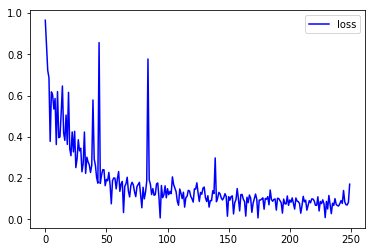

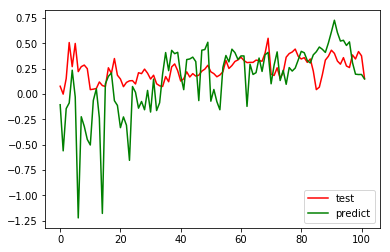

In [3]:
#导入需要用到的包
import numpy as np
import json
import matplotlib.pyplot as plt


#数据处理
def load_data():
    # 从文件导入数据
    datafile = '/home/aistudio/data/data64/housing.data'
    data = np.fromfile(datafile, sep=' ')

    # 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
                      'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)

    # 将原始数据进行Reshape，变成[N, 14]这样的形状
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    # 将原数据集拆分成训练集和测试集
    # 这里使用80%的数据做训练，20%的数据做测试
    # 测试集和训练集必须是没有交集的
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # 计算训练集的最大值，最小值，平均值
    maximums, minimums, avgs = training_data.max(axis=0), training_data.min(axis=0), \
                                 training_data.sum(axis=0) / training_data.shape[0]

    # 对数据进行归一化处理
    for i in range(feature_num):
        #print(maximums[i], minimums[i], avgs[i])
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

    # 训练集和测试集的划分比例
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

training_data, test_data = load_data()
x_train = training_data[:, :-1]
y_train = training_data[:, -1:]
x_test = test_data[:, :-1]
y_test = test_data[:, -1:]

class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        #np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        self.fc1 = Linear(input_dim=13, output_dim=2,act=None)
        self.fc2 = Linear(input_dim=2, output_dim=1, act=None)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        N = x.shape[0]
        gradient_w = 1. / N * np.sum((z-y) * x, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = 1. / N * np.sum(z-y)
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
            
                
    def train(self, training_data, num_epochs, batch_size=10, eta=0.01):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epochs):
            # 在每轮迭代开始之前，将训练数据的顺序随机打乱
            # 然后再按每次取batch_size条数据的方式取出
            np.random.shuffle(training_data)
            # 将训练数据进行拆分，每个mini_batch包含batch_size条的数据
            mini_batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                #print(self.w.shape)
                #print(self.b)
                x = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                a = self.forward(x)
                loss = self.loss(a, y)
                gradient_w, gradient_b = self.gradient(x, y)
                self.update(gradient_w, gradient_b, eta)
                losses.append(loss)
                print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.
                                 format(epoch_id, iter_id, loss))
        
        return losses
    
    def forward(self, x):
        y = np.dot(x, self.w) + self.b
        return y


# 获取数据
train_data, test_data = load_data()
training_data, test_data = load_data()
x_train = training_data[:, :-1]
y_train = training_data[:, -1:]
x_test = test_data[:, :-1]
y_test = test_data[:, -1:]


# 创建网络
net = Network(13)
# 启动训练
losses = net.train(train_data, num_epochs=50, batch_size=100, eta=0.1)

# 画出损失函数的变化趋势
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y,'b',label= 'loss')
plt.legend()
plt.show()

#画出真实值和预测值的曲线
t = np.arange(len(x_test))
y_predict = net.forward(x_test)
plt.plot(t,y_test,'r',label= 'test')
plt.plot(t,y_predict,'g',label= 'predict')
plt.legend()
plt.show()

**paddle**

epoch: 0, iter: 0, loss is: [0.16728319]
epoch: 0, iter: 20, loss is: [0.18611626]
epoch: 0, iter: 40, loss is: [0.03465407]
epoch: 1, iter: 0, loss is: [0.09408231]
epoch: 1, iter: 20, loss is: [0.21832463]
epoch: 1, iter: 40, loss is: [0.04268823]
epoch: 2, iter: 0, loss is: [0.04653178]
epoch: 2, iter: 20, loss is: [0.15077129]
epoch: 2, iter: 40, loss is: [0.15166202]
epoch: 3, iter: 0, loss is: [0.10693263]
epoch: 3, iter: 20, loss is: [0.07704158]
epoch: 3, iter: 40, loss is: [0.07676338]
epoch: 4, iter: 0, loss is: [0.09894134]
epoch: 4, iter: 20, loss is: [0.07928838]
epoch: 4, iter: 40, loss is: [0.18408845]
epoch: 5, iter: 0, loss is: [0.156109]
epoch: 5, iter: 20, loss is: [0.07137765]
epoch: 5, iter: 40, loss is: [0.11315192]
epoch: 6, iter: 0, loss is: [0.05321629]
epoch: 6, iter: 20, loss is: [0.0150696]
epoch: 6, iter: 40, loss is: [0.05911677]
epoch: 7, iter: 0, loss is: [0.03175817]
epoch: 7, iter: 20, loss is: [0.08210853]
epoch: 7, iter: 40, loss is: [0.20415595]
epo

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


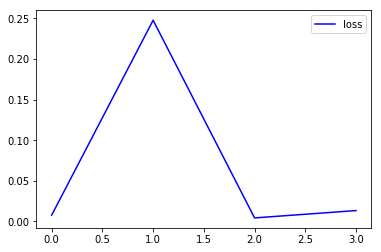

模型保存成功，模型参数保存在LR_model中
Inference result is [[23.298536]], the corresponding label is 19.7


In [2]:
#加载飞桨、Numpy和相关类库
import paddle
import paddle.fluid as fluid
import paddle.fluid.dygraph as dygraph
from paddle.fluid.dygraph import Linear
import numpy as np
import os
import random
import matplotlib.pyplot as plt

#数据处理
def load_data():
    # 从文件导入数据
    datafile = '/home/aistudio/data/data64/housing.data'
    data = np.fromfile(datafile, sep=' ')

    # 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
                      'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)

    # 将原始数据进行Reshape，变成[N, 14]这样的形状
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    # 将原数据集拆分成训练集和测试集
    # 这里使用80%的数据做训练，20%的数据做测试
    # 测试集和训练集必须是没有交集的
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # 计算train数据集的最大值，最小值，平均值
    maximums, minimums, avgs = training_data.max(axis=0), training_data.min(axis=0), \
                                 training_data.sum(axis=0) / training_data.shape[0]
    
    # 记录数据的归一化参数，在预测时对数据做归一化
    global max_values
    global min_values
    global avg_values
    max_values = maximums
    min_values = minimums
    avg_values = avgs

    # 对数据进行归一化处理
    for i in range(feature_num):
        #print(maximums[i], minimums[i], avgs[i])
        data[:, i] = (data[:, i] - avgs[i]) / (maximums[i] - minimums[i])

    # 训练集和测试集的划分比例
    #ratio = 0.8
    #offset = int(data.shape[0] * ratio)
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

#模型设计
class Regressor(fluid.dygraph.Layer):
    #声明每一层网络的实现函数
    def __init__(self):
        super(Regressor, self).__init__()
        
        # 定义一层全连接层，输出维度是1，激活函数为None，即不使用激活函数
        self.fc1 = Linear(input_dim=13, output_dim=2, act=None)
        self.fc2 = Linear(input_dim=2, output_dim=1, act=None)
    
    # 构建神经网络结构，实现前向计算过程，并返回预测结果
    def forward(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x

#训练配置
# 定义飞桨动态图的工作环境
with fluid.dygraph.guard():
    # 声明定义好的线性回归模型
    model = Regressor()
    # 开启模型训练模式
    model.train()
    # 加载数据
    training_data, test_data = load_data()
    # 定义优化算法，这里使用随机梯度下降-SGD
    # 学习率设置为0.01
    opt = fluid.optimizer.SGD(learning_rate=0.01, parameter_list=model.parameters())


#训练过程
with dygraph.guard(fluid.CPUPlace()):
    EPOCH_NUM = 10   # 设置外层循环次数
    BATCH_SIZE = 10  # 设置batch大小
    
    # 定义外层循环
    for epoch_id in range(EPOCH_NUM):
        # 在每轮迭代开始之前，将训练数据的顺序随机的打乱
        np.random.shuffle(training_data)
        # 将训练数据进行拆分，每个batch包含10条数据
        mini_batches = [training_data[k:k+BATCH_SIZE] for k in range(0, len(training_data), BATCH_SIZE)]
        # 定义内层循环
        for iter_id, mini_batch in enumerate(mini_batches):
            x = np.array(mini_batch[:, :-1]).astype('float32') # 获得当前批次训练数据
            y = np.array(mini_batch[:, -1:]).astype('float32') # 获得当前批次训练标签（真实房价）
            # 将numpy数据转为飞桨动态图variable形式
            house_features = dygraph.to_variable(x)
            prices = dygraph.to_variable(y)
            
            # 前向计算
            predicts = model(house_features)
            
            # 计算损失
            loss = fluid.layers.square_error_cost(predicts, label=prices)
            avg_loss = fluid.layers.mean(loss)
            if iter_id%20==0:
                losses = loss
                print("epoch: {}, iter: {}, loss is: {}".format(epoch_id, iter_id, avg_loss.numpy()))
            
            # 反向传播
            avg_loss.backward()
            # 最小化loss,更新参数
            opt.minimize(avg_loss)
            # 清除梯度
            model.clear_gradients()
    # 保存模型
    fluid.save_dygraph(model.state_dict(), 'LR_model')

plot_x = np.arange(len(loss))
plot_y = np.array(loss)
plt.plot(plot_x, plot_y,'b',label= 'loss')
plt.legend()
plt.show()
#保存模型
# 定义飞桨动态图工作环境
with fluid.dygraph.guard():
    # 保存模型参数，文件名为LR_model
    fluid.save_dygraph(model.state_dict(), 'LR_model')
    print("模型保存成功，模型参数保存在LR_model中")

#测试模型
def load_one_example(data_dir):
    f = open(data_dir, 'r')
    datas = f.readlines()
    # 选择倒数第10条数据用于测试
    tmp = datas[-10]
    tmp = tmp.strip().split()
    one_data = [float(v) for v in tmp]

    # 对数据进行归一化处理
    for i in range(len(one_data)-1):
        one_data[i] = (one_data[i] - avg_values[i]) / (max_values[i] - min_values[i])

    data = np.reshape(np.array(one_data[:-1]), [1, -1]).astype(np.float32)
    label = one_data[-1]
    return data, label




with dygraph.guard():
    # 参数为保存模型参数的文件地址
    model_dict, _ = fluid.load_dygraph('LR_model')
    model.load_dict(model_dict)
    model.eval()

    # 参数为数据集的文件地址
    test_data, label = load_one_example('/home/aistudio/data/data64/housing.data')
    # 将数据转为动态图的variable格式
    test_data = dygraph.to_variable(test_data)
    results = model(test_data)

    # 对结果做反归一化处理
    results = results * (max_values[-1] - min_values[-1]) + avg_values[-1]
    print("Inference result is {}, the corresponding label is {}".format(results.numpy(), label))
